# C++ Branch and Bound with Python Callbacks

This implementation shall allow us to quickly implement new ideas an check the performance.
The branch and bound is implemented in reasonably fast C++, while PyBind11 allows us to not only call it but also to add lower and upper bounds via a callback that is called at every node.

In [1]:
# import the stuff
from cetsp.core import Circle, Instance, compute_tour_by_2opt, branch_and_bound, Point, plot_solution

In [2]:
# create a simple instance
circles = [Circle(Point(x*1.5, y*1.5), 1) for x in range(6) for y in range(6)]
instance = Instance(circles)

## Initial Solution

Branch and Bound can benefit from a good upper bound. However, it is also pretty quick in finding good solutions so probably it is more promising to go for lower bounds.

In [3]:
# compute an initial solution via 2opt
initial_solution = compute_tour_by_2opt(instance)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-11-13


In [4]:
def cb(node, solution_pool):
    if node.is_feasible(0.01):
        ub = solution_pool.get_upper_bound()
        print(f"Found a new solution! The currently best solution has a value of {ub}.")
        
timelimit = 60
opt_solution = branch_and_bound(instance, cb , initial_solution, timelimit)

i	LB	|	UB
0	24.3431	|	33.6512
1	24.8308	|	33.6512
2	24.8308	|	33.6512
3	24.8308	|	33.6512
4	24.8308	|	33.6512
5	24.8308	|	33.6512
6	24.8308	|	33.6512
Found a new solution! The currently best solution has a value of 33.651184811859416.
7	24.8308	|	33.6512
8	24.8308	|	33.6512
9	24.8308	|	26.8167
10	24.8308	|	26.8167
20	24.8308	|	26.8167
30	24.8308	|	26.8167
40	24.8308	|	26.8167
50	24.8308	|	26.8167
60	24.8308	|	26.8167
70	24.8308	|	26.8167
80	24.8308	|	26.8167
90	24.8308	|	26.8167
100	24.8308	|	26.8167
200	24.8308	|	26.8167
Found a new solution! The currently best solution has a value of 26.816731253381754.
300	25.3574	|	26.8167
400	25.8984	|	26.8167
500	26.3488	|	26.8167
---------------
532	26.8167	|	26.8167


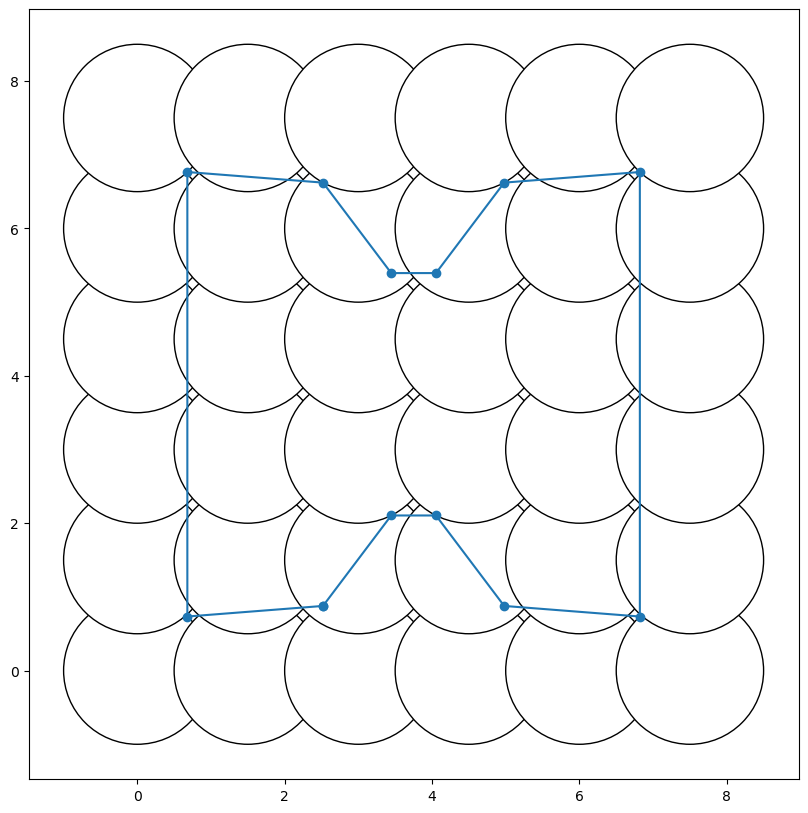

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plot_solution(plt.gca(), instance, opt_solution)

## Getting data and manipulating the nodes via callback.

The callbacks allow us to access a lot of data and we can use it to influence the BnB in most ways.

The following example does some useless things just to show off. Note how the lower bound gets higher because of this (the lower bound is bad because of the manipulation).

In [6]:
def cb(node, solution_pool):
    order = node.get_fixed_sequence()
    if order[1]<order[2]:  # useless abort if order[1] has a lower index than order[2]
        node.prune()
        return
    
    if node.is_feasible(0.01):
        ub = solution_pool.get_upper_bound()
        obj = node.get_relaxed_solution().length()
        print(f"Found a new solution of value {obj}! The currently best solution has a value of {ub}.")
        order = node.get_fixed_sequence()
        print(f"Its sequence is {order}")
    else:
        node.add_lower_bound(node.get_lower_bound()*1.05)  # increasing the lb by the relaxation by 5% (also a stupid idea)
        
        
timelimit = 60
opt_solution = branch_and_bound(instance, cb , initial_solution, timelimit)

i	LB	|	UB
0	24.3431	|	33.6512
1	25.5603	|	33.6512
2	25.5603	|	33.6512
3	26.0723	|	33.6512
4	26.0723	|	33.6512
5	26.3488	|	33.6512
6	26.3488	|	33.6512
7	26.3488	|	33.6512
8	26.3488	|	33.6512
9	26.3488	|	33.6512
10	26.3488	|	33.6512
Found a new solution of value 28.785471532532796! The currently best solution has a value of 33.651184811859416.
Its sequence is [30, 35, 23, 21, 20, 17, 5, 3, 14, 2, 0]
20	26.3488	|	28.7855
30	26.3488	|	28.7855
40	26.3488	|	28.7855
50	26.3488	|	28.7855
60	26.3488	|	28.7855
70	26.3488	|	28.7855
80	26.3488	|	28.7855
90	26.3488	|	28.7855
100	26.3488	|	28.7855
200	26.3488	|	28.7855
300	26.3488	|	28.7855
400	26.3488	|	28.7855
Found a new solution of value 28.220626452938426! The currently best solution has a value of 28.785471532532796.
Its sequence is [30, 35, 23, 20, 21, 14, 17, 5, 0]
500	26.3488	|	28.2206
---------------
533	28.1641	|	28.2206


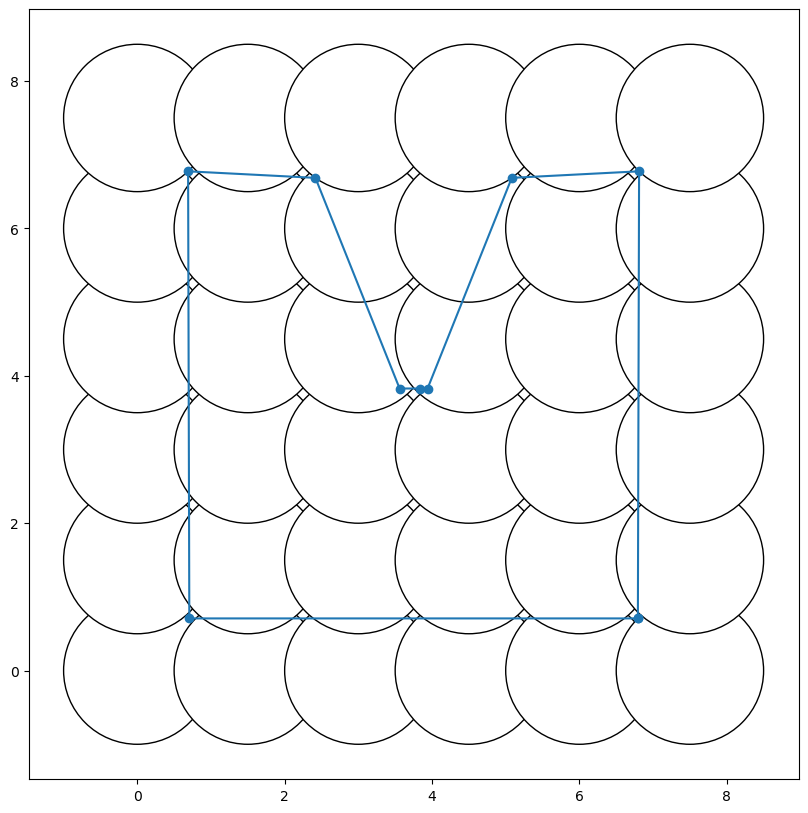

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plot_solution(plt.gca(), instance, opt_solution)